In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

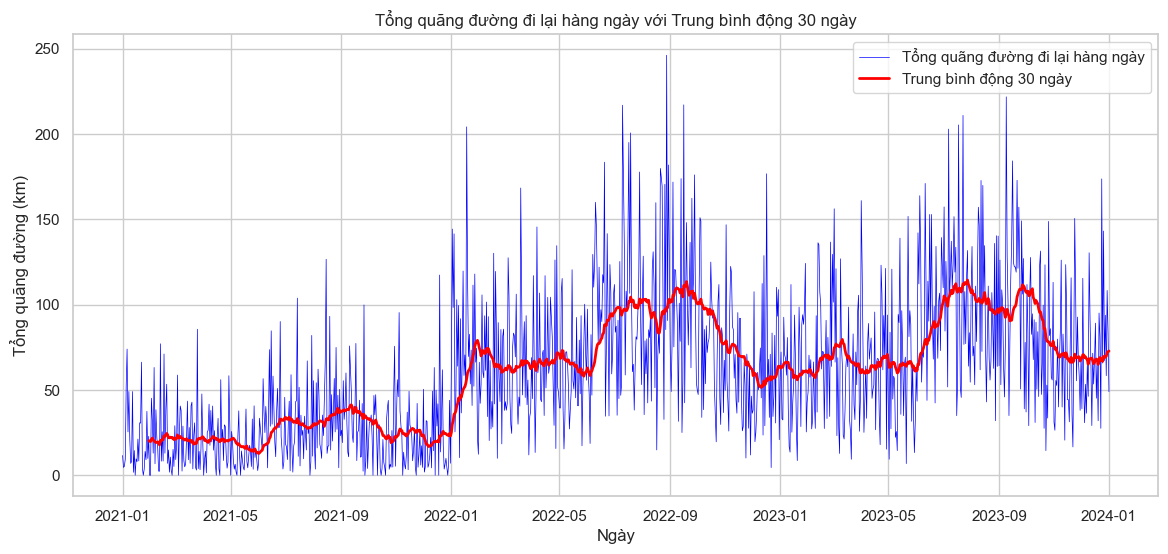

In [12]:
df = pd.read_csv("data/du_lieu_di_chuyen.csv", parse_dates=['Ngày'])

sns.set(style="whitegrid")

df['Trung bình động 30 ngày'] = df['Tổng quãng đường đi lại'].rolling(window=30).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['Ngày'], df['Tổng quãng đường đi lại'], color='blue', linewidth=0.5, label="Tổng quãng đường đi lại hàng ngày")
plt.plot(df['Ngày'], df['Trung bình động 30 ngày'], color='red', linewidth=2, label="Trung bình động 30 ngày")


plt.title("Tổng quãng đường đi lại hàng ngày với Trung bình động 30 ngày")
plt.xlabel("Ngày")
plt.ylabel("Tổng quãng đường (km)")
plt.legend()
plt.show()

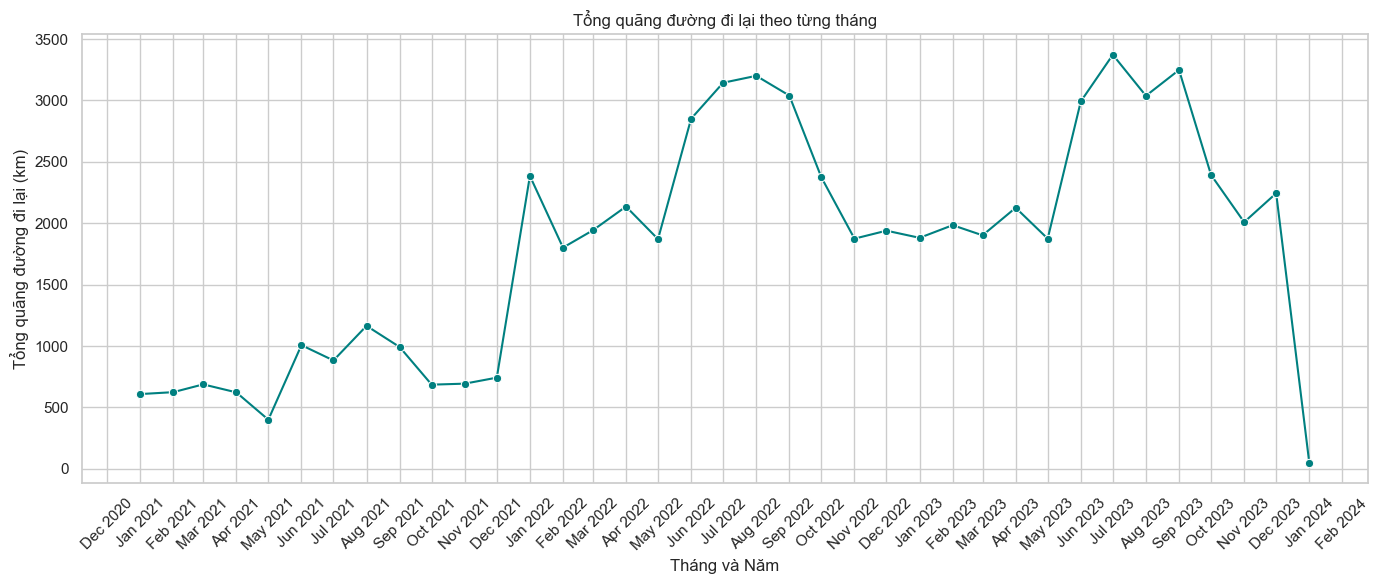

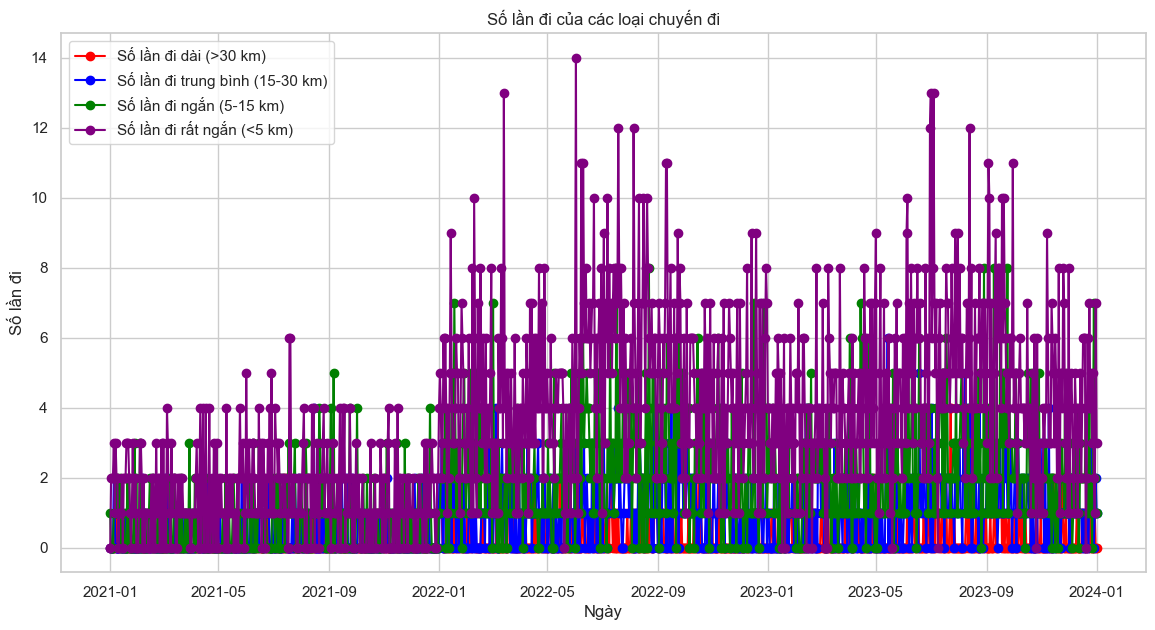

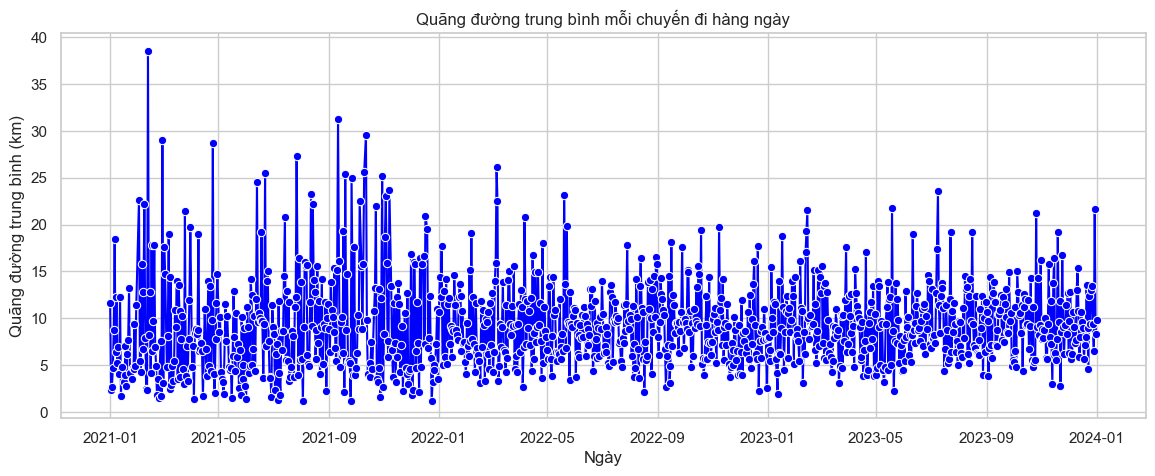

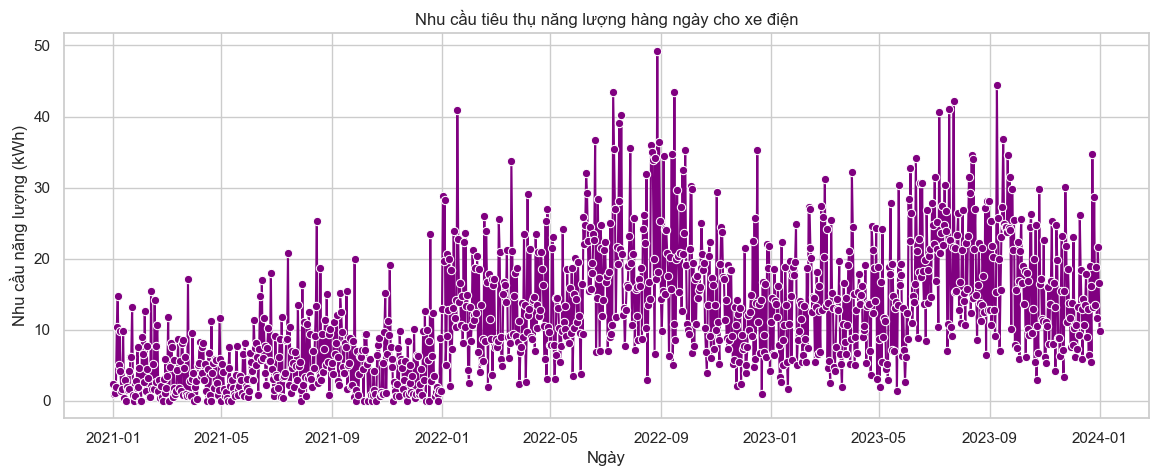

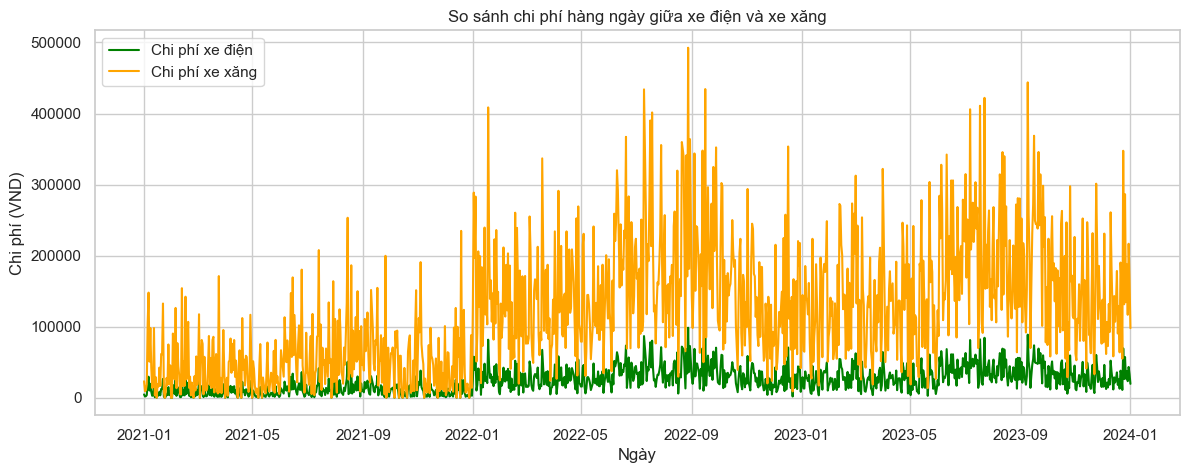

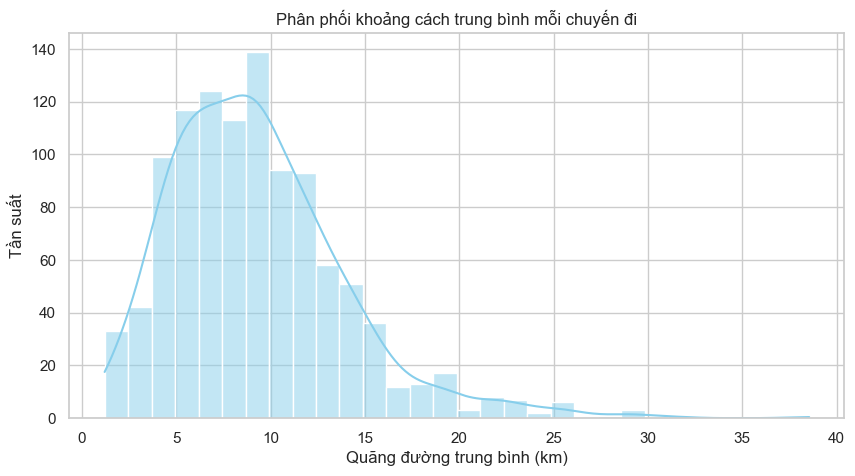

Phân tích xong. Xem các biểu đồ và kết quả để rút ra các đặc trưng của dữ liệu.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Đọc dữ liệu di chuyển và chuyển cột 'Ngày' sang định dạng ngày tháng
df = pd.read_csv("data/du_lieu_di_chuyen.csv", parse_dates=['Ngày'])
# Tạo cột 'Tháng-Năm' để thể hiện tháng và năm
df['Tháng-Năm'] = df['Ngày'].dt.strftime('%b %Y')  # Định dạng thành 'Tháng Năm'

# Tính tổng quãng đường đi lại theo từng tháng
monthly_data = df.groupby('Tháng-Năm')['Tổng quãng đường đi lại'].sum().reset_index()

# Chuyển đổi cột 'Tháng-Năm' về dạng datetime để dễ dàng sắp xếp
monthly_data['Tháng-Năm'] = pd.to_datetime(monthly_data['Tháng-Năm'], format='%b %Y')
monthly_data = monthly_data.sort_values('Tháng-Năm')  # Sắp xếp theo thời gian

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_data, x='Tháng-Năm', y='Tổng quãng đường đi lại', marker="o", color='teal')
plt.title("Tổng quãng đường đi lại theo từng tháng")
plt.xlabel("Tháng và Năm")
plt.ylabel("Tổng quãng đường đi lại (km)")

# Định dạng trục x để hiển thị tháng và năm rõ ràng
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Đánh dấu mỗi tháng
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # Định dạng thành 'Tháng Năm'
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc

plt.tight_layout()
plt.show()

# 3. Phân tích số lần đi dài, trung bình, ngắn và rất ngắn
# Tạo một dataframe cho các loại chuyến đi
df_long = df[['Ngày', 'Số lần đi dài (>30 km)']].set_index('Ngày')
df_medium = df[['Ngày', 'Số lần đi trung bình (15-30 km)']].set_index('Ngày')
df_short = df[['Ngày', 'Số lần đi ngắn (5-15 km)']].set_index('Ngày')
df_very_short = df[['Ngày', 'Số lần đi rất ngắn (<5 km)']].set_index('Ngày')

# Vẽ biểu đồ về số lần đi của từng loại
plt.figure(figsize=(14, 7))
plt.plot(df_long.index, df_long['Số lần đi dài (>30 km)'], label="Số lần đi dài (>30 km)", marker="o", color="red")
plt.plot(df_medium.index, df_medium['Số lần đi trung bình (15-30 km)'], label="Số lần đi trung bình (15-30 km)", marker="o", color="blue")
plt.plot(df_short.index, df_short['Số lần đi ngắn (5-15 km)'], label="Số lần đi ngắn (5-15 km)", marker="o", color="green")
plt.plot(df_very_short.index, df_very_short['Số lần đi rất ngắn (<5 km)'], label="Số lần đi rất ngắn (<5 km)", marker="o", color="purple")

plt.title("Số lần đi của các loại chuyến đi")
plt.xlabel("Ngày")
plt.ylabel("Số lần đi")
plt.legend()
plt.show()

# 4. Phân tích quãng đường trung bình mỗi chuyến đi (theo ngày)
df['Quãng đường trung bình mỗi chuyến đi'] = df['Tổng quãng đường đi lại'] / (df['Số lần đi dài (>30 km)'] + df['Số lần đi trung bình (15-30 km)'] + df['Số lần đi ngắn (5-15 km)'] + df['Số lần đi rất ngắn (<5 km)'])

plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x='Ngày', y='Quãng đường trung bình mỗi chuyến đi', marker="o", color="blue")
plt.title("Quãng đường trung bình mỗi chuyến đi hàng ngày")
plt.xlabel("Ngày")
plt.ylabel("Quãng đường trung bình (km)")
plt.show()

# 5. Dự tính mức tiêu thụ năng lượng và thời gian sạc (giả sử một EV tiêu thụ 0.2 kWh/km)
df['Nhu cầu năng lượng (kWh)'] = df['Tổng quãng đường đi lại'] * 0.2
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x='Ngày', y='Nhu cầu năng lượng (kWh)', color="purple", marker="o")
plt.title("Nhu cầu tiêu thụ năng lượng hàng ngày cho xe điện")
plt.xlabel("Ngày")
plt.ylabel("Nhu cầu năng lượng (kWh)")
plt.show()

# 6. Tính toán chi phí sử dụng xe điện so với xe truyền thống
# Giả sử giá điện là 2000 VND/kWh và xăng là 25000 VND/lít với xe xăng tiêu thụ trung bình 8 lít/100 km
gia_dien = 2000  
gia_xang = 25000  
tieu_thu_xang = 8 / 100  
df['Chi phí xe điện (VND)'] = df['Nhu cầu năng lượng (kWh)'] * gia_dien
df['Chi phí xe xăng (VND)'] = df['Tổng quãng đường đi lại'] * gia_xang * tieu_thu_xang

plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x='Ngày', y='Chi phí xe điện (VND)', label='Chi phí xe điện', color="green")
sns.lineplot(data=df, x='Ngày', y='Chi phí xe xăng (VND)', label='Chi phí xe xăng', color="orange")
plt.title("So sánh chi phí hàng ngày giữa xe điện và xe xăng")
plt.xlabel("Ngày")
plt.ylabel("Chi phí (VND)")
plt.legend()
plt.show()

# 7. Phân tích nhu cầu sử dụng cho các chuyến đi dài
plt.figure(figsize=(10, 5))
sns.histplot(df['Quãng đường trung bình mỗi chuyến đi'], bins=30, kde=True, color="skyblue")
plt.title("Phân phối khoảng cách trung bình mỗi chuyến đi")
plt.xlabel("Quãng đường trung bình (km)")
plt.ylabel("Tần suất")
plt.show()

# Tổng kết các kết quả và lưu ý
print("Phân tích xong. Xem các biểu đồ và kết quả để rút ra các đặc trưng của dữ liệu.")


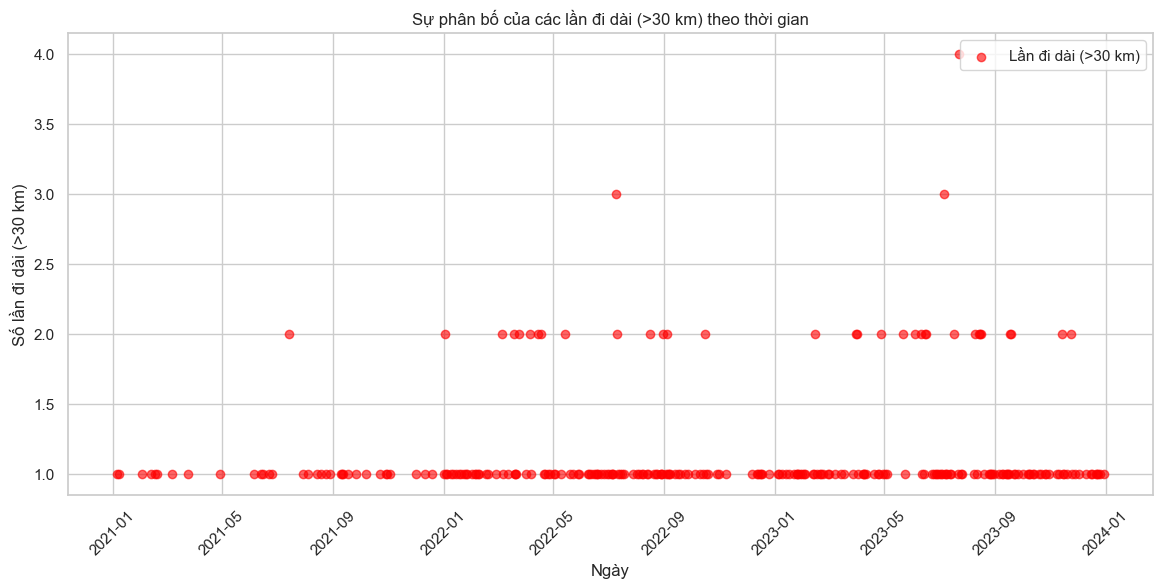

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo DataFrame chỉ chứa số lần đi dài
df_long_trips = df[df['Số lần đi dài (>30 km)'] > 0]

# Vẽ biểu đồ scatter
plt.figure(figsize=(14, 6))
plt.scatter(df_long_trips['Ngày'], df_long_trips['Số lần đi dài (>30 km)'], color='red', label='Lần đi dài (>30 km)', alpha=0.6)
plt.title('Sự phân bố của các lần đi dài (>30 km) theo thời gian')
plt.xlabel('Ngày')
plt.ylabel('Số lần đi dài (>30 km)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_14796\3016397431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long_trips['Ngày'] = pd.to_datetime(df_long_trips['Ngày'])


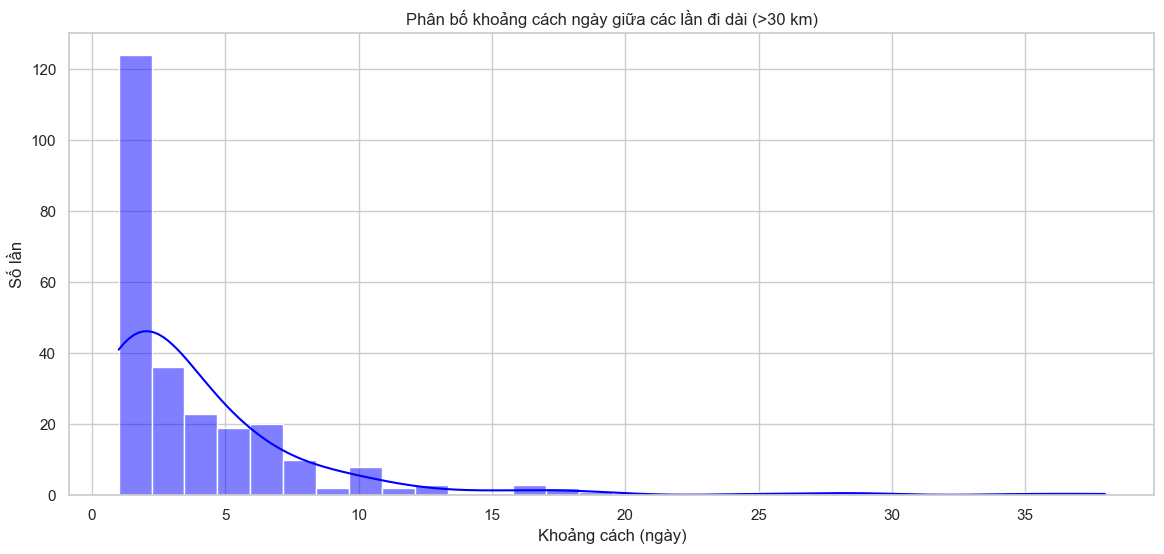

In [10]:
# Tính khoảng cách giữa các lần đi dài (ngày giữa các lần đi)
df_long_trips['Ngày'] = pd.to_datetime(df_long_trips['Ngày'])
df_long_trips_sorted = df_long_trips.sort_values('Ngày')
df_long_trips_sorted['Ngày cách nhau'] = df_long_trips_sorted['Ngày'].diff().dt.days

# Vẽ histogram của khoảng cách ngày giữa các lần đi dài
plt.figure(figsize=(14, 6))
sns.histplot(df_long_trips_sorted['Ngày cách nhau'].dropna(), kde=True, color='blue', bins=30)
plt.title('Phân bố khoảng cách ngày giữa các lần đi dài (>30 km)')
plt.xlabel('Khoảng cách (ngày)')
plt.ylabel('Số lần')
plt.grid(True)
plt.show()


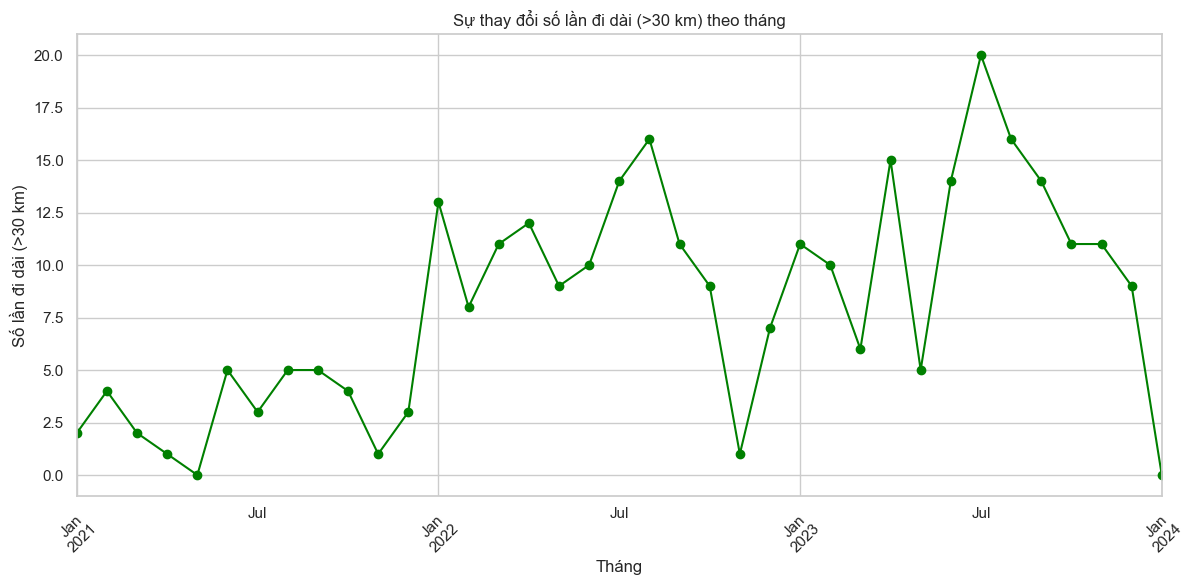

In [11]:
# Tính số lần đi dài theo từng tháng
df['Tháng'] = df['Ngày'].dt.to_period('M')
monthly_long_trips = df.groupby('Tháng')['Số lần đi dài (>30 km)'].sum()

# Vẽ line plot
plt.figure(figsize=(14, 6))
monthly_long_trips.plot(kind='line', color='green', marker='o')
plt.title('Sự thay đổi số lần đi dài (>30 km) theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lần đi dài (>30 km)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
